# Разведочный анализ данных

Нужно познакомиться с данными и постараться найти какие-то скрытые закономерности, которые можно использовать при обучении моделей.

In [1]:
# !pip install pandas openpyxl
# !pip install nltk

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('dataset.xlsx')

In [4]:
df.head(3)

,id,Почему именно вы должны стать студентом в Школе программирования? (Свободный ответ),баллы,Как вы будете применять полученные знания и навыки? (Свободный ответ),баллы.1,"Расскажите про ситуацию (рабочую), где вы справились/взялись за задачу сверх своих обязанностей. Почему? (Свободный ответ)",баллы,итог
0,train_0,для анализа массивов данных необходимых в работе,2.0,для анализа массивов данных необходимых в работе,2.0,"стараюсь всегда брать задачи, выполнение котор...",2.0,6.0
1,train_1,Буду использовать полученные знания в работе д...,2.0,Автоматизирую процесс сбора данных и дальнейше...,2.0,Задача по анализу кода и содержанию пакетов - ...,1.5,5.5
2,train_2,хочу стать топовым программистом во всём мире ...,1.5,изучаю программирование,1.5,-,0.0,3.0


Запомним вопросы в отдельную переменную и зададим удобные названия для колонок:

In [5]:
questions = [
    'Почему именно вы должны стать студентом в Школе программирования?',
    'Как вы будете применять полученные знания и навыки?',
    'Расскажите про ситуацию (рабочую), где вы справились/взялись за задачу сверх своих обязанностей. Почему?'
]

In [6]:
df.columns = ['id', 'answer1', 'score1', 'answer2', 'score2', 'answer3', 'score3', 'result']

In [7]:
df.head(3)

,id,answer1,score1,answer2,score2,answer3,score3,result
0,train_0,для анализа массивов данных необходимых в работе,2.0,для анализа массивов данных необходимых в работе,2.0,"стараюсь всегда брать задачи, выполнение котор...",2.0,6.0
1,train_1,Буду использовать полученные знания в работе д...,2.0,Автоматизирую процесс сбора данных и дальнейше...,2.0,Задача по анализу кода и содержанию пакетов - ...,1.5,5.5
2,train_2,хочу стать топовым программистом во всём мире ...,1.5,изучаю программирование,1.5,-,0.0,3.0


Разобьем датасет на тренировочную (размеченную) выборку и валидационную (новые неразмеченные данные):

In [8]:
df_train = df.iloc[:651].copy()

In [9]:
df_test = df[651:].copy()

In [10]:
df_train.head(3)

,id,answer1,score1,answer2,score2,answer3,score3,result
0,train_0,для анализа массивов данных необходимых в работе,2.0,для анализа массивов данных необходимых в работе,2.0,"стараюсь всегда брать задачи, выполнение котор...",2.0,6.0
1,train_1,Буду использовать полученные знания в работе д...,2.0,Автоматизирую процесс сбора данных и дальнейше...,2.0,Задача по анализу кода и содержанию пакетов - ...,1.5,5.5
2,train_2,хочу стать топовым программистом во всём мире ...,1.5,изучаю программирование,1.5,-,0.0,3.0


In [11]:
# убираем переводы строки
df_train.loc[:, ['answer1', 'answer2', 'answer3']] = df_train[['answer1', 'answer2', 'answer3']].apply(lambda x: x.str.replace('\n', ' '))
df_test.loc[:, ['answer1', 'answer2', 'answer3']] = df_test[['answer1', 'answer2', 'answer3']].apply(lambda x: x.str.replace('\n', ' '))

Сохраним предобработанные датафреймы для дальнейшего использования при разработке моделей:

In [12]:
df_train.to_csv('data.csv', index=False)
df_test.to_csv('new_data.csv', index=False)

Смотрим статистики:

In [13]:
df_train['score1'] \
    .value_counts() \
    .to_frame() \
    .sort_values(by=['score1']) \
    .reset_index().T

,0,1,2,3,4,5,6,7
score1,0.0,0.5,1.0,1.5,2.0,2.25,2.5,3.0
count,57.0,13.0,294.0,45.0,159.0,5.00,8.0,70.0


In [14]:
df_train['score2'] \
    .value_counts() \
    .to_frame() \
    .sort_values(by=['score2']) \
    .reset_index().T

,0,1,2,3,4,5,6
score2,0.0,0.5,1.0,1.5,2.0,2.5,3.0
count,49.0,7.0,207.0,25.0,230.0,7.0,126.0


In [15]:
df_train['score3'] \
    .value_counts() \
    .to_frame() \
    .sort_values(by=['score3']) \
    .reset_index().T

,0,1,2,3,4,5,6
score3,0.0,0.5,1.0,1.5,2.0,2.5,3.0
count,63.0,10.0,157.0,45.0,231.0,10.0,135.0


Значение для первой оценки 2.25 похоже на выброс, можем объединить с 2.5:

In [16]:
df_train['score1'] = df_train['score1'].apply(lambda score: 2.5 if score == 2.25 else score)

In [17]:
df_train['score1'].value_counts().to_frame().sort_values(by=['score1']).reset_index().T

,0,1,2,3,4,5,6
score1,0.0,0.5,1.0,1.5,2.0,2.5,3.0
count,57.0,13.0,294.0,45.0,159.0,13.0,70.0


Посмотрим как распределены оценки для ответов:

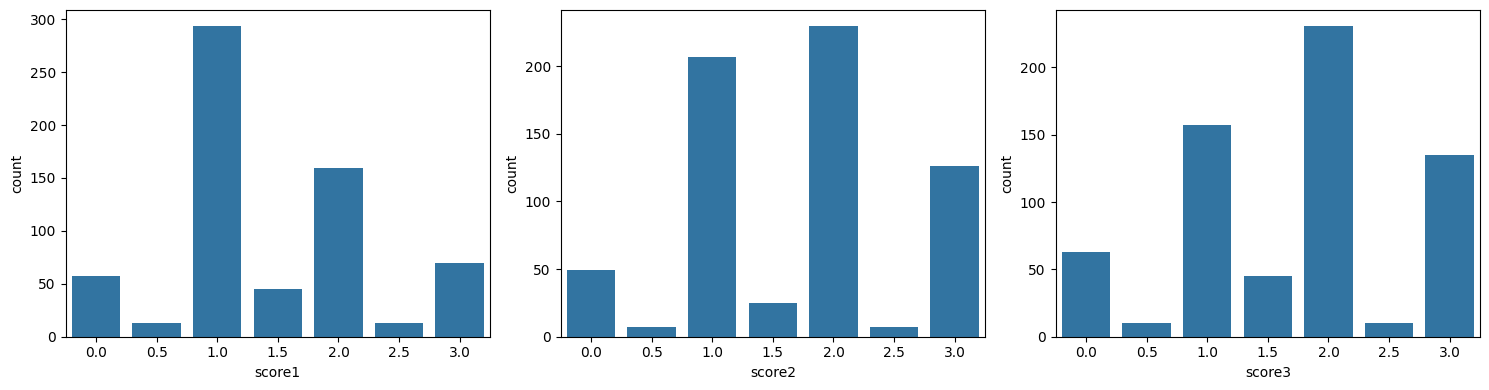

In [18]:
plt.figure(figsize=(15, 4))

for i in range(3):
    df_train[f'score{i+1}'] = df_train[f'score{i+1}'].round(1)
    plt.subplot(1, 3, 1+i)
    sns.countplot(x=f'score{i+1}', data=df_train)

plt.tight_layout()
plt.show()

Посмотрим, есть ли связь между длинной ответа и оценкой:

In [19]:
for col in ['answer1', 'answer2', 'answer3']:
    df_train[f'{col}_len'] = df_train[col].str.len()

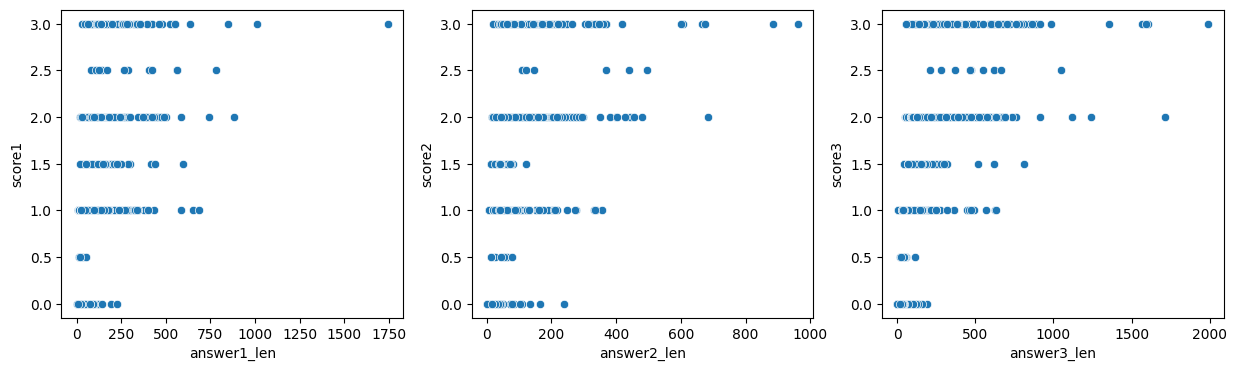

In [20]:
plt.figure(figsize=(15, 4))

for i, col in enumerate(['answer1', 'answer2', 'answer3']):
    plt.subplot(1, 3, 1+i)
    sns.scatterplot(x=f'{col}_len', y=f'score{i+1}', data=df_train)

plt.show()

Небльшая связь все-таки есть. Например, можно заметить, что:
- ответы (на любой из вопросов) длиной более 250 символов получают оценку не меньше 1
- ответы на 1ый вопрос длиной более 750 символов, нв 2ой вопрос - более 400 символов, на 3ий вопрос - более 1000 символов: получают оценку не меньше 2
- несколько самых длинных ответов получают высшую оценку

Про корокткие или средние ответы ничего однозначно сказать нельзя: они оцениваются по-разному, хотя есть одна особенность у оценки 2.5 - для ответов с длинной около 0, она почему-то не ставится

Посмотрим, как распределена длина ответа на вопросы в зависимости от оценки ответа:

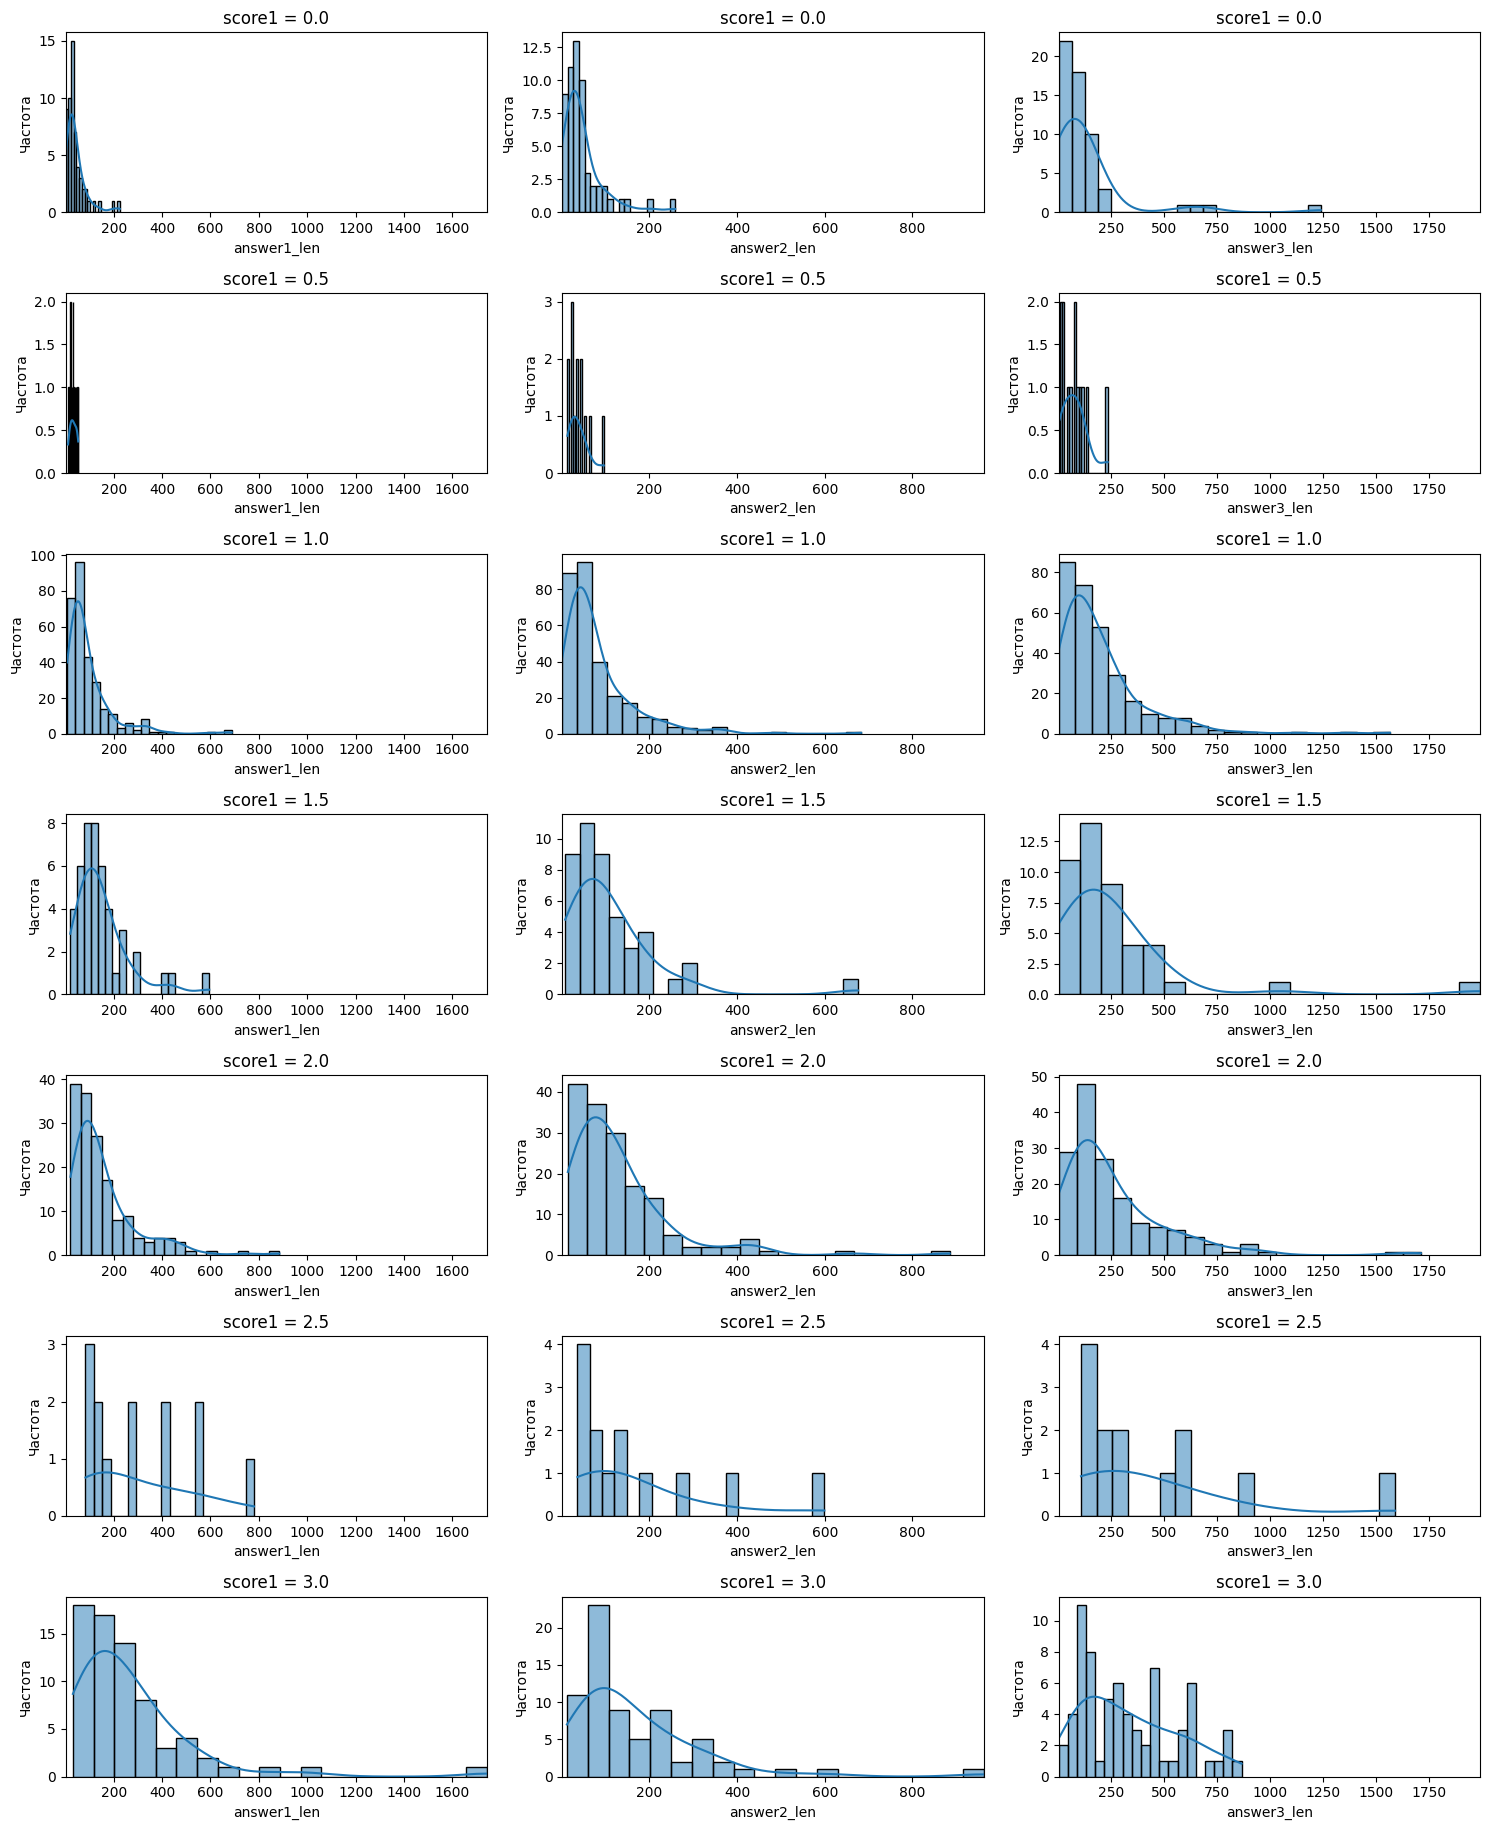

In [21]:
scores = df_train['score1'].unique()
fig, axes = plt.subplots(len(scores), 3, figsize=(15, 20))

min_answer1 = df_train['answer1_len'].min()
max_answer1 = df_train['answer1_len'].max()

min_answer2 = df_train['answer2_len'].min()
max_answer2 = df_train['answer2_len'].max()

min_answer3 = df_train['answer3_len'].min()
max_answer3 = df_train['answer3_len'].max()

for i, score in enumerate(sorted(scores)):
    filtered_data = df_train[df_train['score1'] == score]

    ax1 = sns.histplot(filtered_data['answer1_len'], bins=20, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'score1 = {score}')
    axes[i, 0].set_xlabel('answer1_len')
    axes[i, 0].set_ylabel('Частота')
    axes[i, 0].set_xlim(min_answer1, max_answer1)

    ax2 = sns.histplot(filtered_data['answer2_len'], bins=20, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'score1 = {score}')
    axes[i, 1].set_xlabel('answer2_len')
    axes[i, 1].set_ylabel('Частота')
    axes[i, 1].set_xlim(min_answer2, max_answer2)

    ax3 = sns.histplot(filtered_data['answer3_len'], bins=20, ax=axes[i, 2], kde=True)
    axes[i, 2].set_title(f'score1 = {score}')
    axes[i, 2].set_xlabel('answer3_len')
    axes[i, 2].set_ylabel('Частота')
    axes[i, 2].set_xlim(min_answer3, max_answer3)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Посмотрим на связь между оценками за разные вопросы:

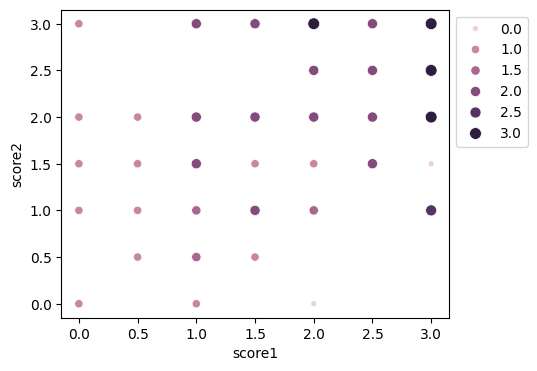

In [22]:
plt.figure(figsize=(5,4))
agg_df = df_train.groupby(['score1', 'score2'], as_index=False).agg({'score3': 'median'})

sns.scatterplot(x='score1', y='score2', hue='score3', size='score3', data=agg_df)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Оценки на разные вопросы явно не являются независимыми: видно, что если человек получает плохую оценку за первые 2 ответа, то он почти наверняка получит плохую оценку и за 3ий ответ. Так же и с положительными ответами. Также, например, видно, что в целом нет такого, что один и тот же человек получается диаметрально разные оценки за разные ответы, допустим, 0 и 3 или 0.5 и 2.5.

Посмотрим на самые частые комбинации оценок:

In [23]:
result = df.groupby(['score1', 'score2', 'score3']).size().reset_index(name='count')
result.sort_values(by='count', ascending=False).T

,32,76,34,44,109,85,78,48,30,58,...,12,8,7,77,13,79,40,37,83,65
score1,1.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.5,...,0.0,0.0,0.0,2.0,0.5,2.0,1.0,1.0,2.0,2.0
score2,1.0,2.0,1.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0,...,3.0,1.5,1.5,2.0,0.5,2.5,1.5,1.5,3.0,0.0
score3,1.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,2.0,...,1.0,2.0,0.0,2.5,0.0,1.0,3.0,0.0,1.0,0.0
count,48.0,42.0,42.0,37.0,28.0,25.0,22.0,19.0,17.0,17.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [24]:
df_train.head()

,id,answer1,score1,answer2,score2,answer3,score3,result,answer1_len,answer2_len,answer3_len
0,train_0,для анализа массивов данных необходимых в работе,2.0,для анализа массивов данных необходимых в работе,2.0,"стараюсь всегда брать задачи, выполнение котор...",2.0,6.0,48,48.0,548
1,train_1,Буду использовать полученные знания в работе д...,2.0,Автоматизирую процесс сбора данных и дальнейше...,2.0,Задача по анализу кода и содержанию пакетов - ...,1.5,5.5,139,113.0,320
2,train_2,хочу стать топовым программистом во всём мире ...,1.5,изучаю программирование,1.5,-,0.0,3.0,63,23.0,1
3,train_3,"Смогу применить знания в своей професси, получ...",2.0,Буду заниматься автоматизацией и отладкой рабо...,2.5,Как и указано выше мне интересно улучшить суще...,2.5,7.0,94,108.0,371
4,train_4,Повысить уровень образования.,1.0,Использовать для автоматизации своих задач.,2.0,Не возникало рабочих сверхзадач связанных с на...,1.0,4.0,29,43.0,70


Рассмотрим корреляцию между признаками:

In [25]:
df_train = df_train.drop(['result'], axis=1)

In [26]:
df_train.head()

,id,answer1,score1,answer2,score2,answer3,score3,answer1_len,answer2_len,answer3_len
0,train_0,для анализа массивов данных необходимых в работе,2.0,для анализа массивов данных необходимых в работе,2.0,"стараюсь всегда брать задачи, выполнение котор...",2.0,48,48.0,548
1,train_1,Буду использовать полученные знания в работе д...,2.0,Автоматизирую процесс сбора данных и дальнейше...,2.0,Задача по анализу кода и содержанию пакетов - ...,1.5,139,113.0,320
2,train_2,хочу стать топовым программистом во всём мире ...,1.5,изучаю программирование,1.5,-,0.0,63,23.0,1
3,train_3,"Смогу применить знания в своей професси, получ...",2.0,Буду заниматься автоматизацией и отладкой рабо...,2.5,Как и указано выше мне интересно улучшить суще...,2.5,94,108.0,371
4,train_4,Повысить уровень образования.,1.0,Использовать для автоматизации своих задач.,2.0,Не возникало рабочих сверхзадач связанных с на...,1.0,29,43.0,70


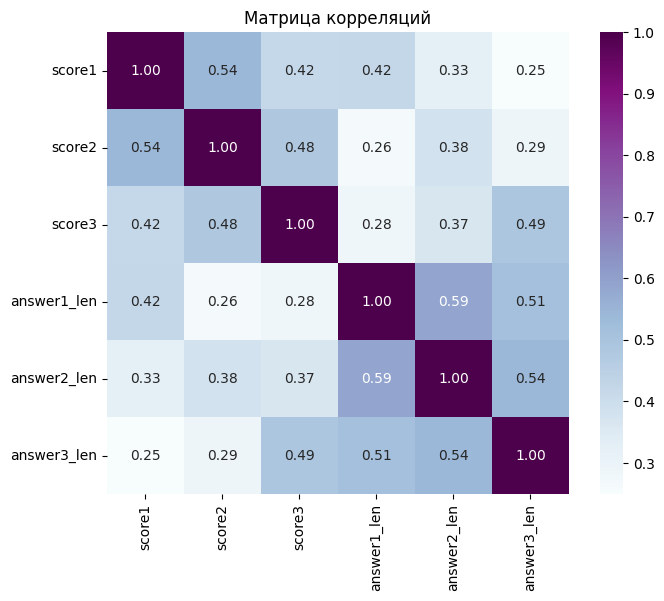

In [27]:
corr_matrix = df_train[['score1', 'score2', 'score3', 'answer1_len', 'answer2_len', 'answer3_len']].corr()
plt.figure(figsize=(8, 6)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='BuPu', square=True)
plt.title('Матрица корреляций')
plt.show()

По матрице корелляций особенно видна линейная связь между:
- длинной ответа и оценкой за него;
- оценкой за прдедыщущий ответ и за текущий;
- длинной предыдущего ответа и текущего.

Удалим колонки, которые не участвуют при обучении:

In [28]:
df_train = df_train.drop(columns=['id'])

In [29]:
df_train.head()

,answer1,score1,answer2,score2,answer3,score3,answer1_len,answer2_len,answer3_len
0,для анализа массивов данных необходимых в работе,2.0,для анализа массивов данных необходимых в работе,2.0,"стараюсь всегда брать задачи, выполнение котор...",2.0,48,48.0,548
1,Буду использовать полученные знания в работе д...,2.0,Автоматизирую процесс сбора данных и дальнейше...,2.0,Задача по анализу кода и содержанию пакетов - ...,1.5,139,113.0,320
2,хочу стать топовым программистом во всём мире ...,1.5,изучаю программирование,1.5,-,0.0,63,23.0,1
3,"Смогу применить знания в своей професси, получ...",2.0,Буду заниматься автоматизацией и отладкой рабо...,2.5,Как и указано выше мне интересно улучшить суще...,2.5,94,108.0,371
4,Повысить уровень образования.,1.0,Использовать для автоматизации своих задач.,2.0,Не возникало рабочих сверхзадач связанных с на...,1.0,29,43.0,70


Выполним очистку текста от лишних символов (знаков припинания и других символов отличных от букв и цифр):

In [30]:
def clear_text_data(frame):
    new_frame = frame.copy()
    for col in ['answer1', 'answer2', 'answer3']:
        new_frame[col] = new_frame[col].str.lower().str.replace('[^\w\s]', '')
    return new_frame

In [31]:
df_train = clear_text_data(df_train)

In [32]:
df_train['answer1'] = df_train['answer1'].str.lower().str.replace('[^\w\s]', '')

In [33]:
df_train.head()

,answer1,score1,answer2,score2,answer3,score3,answer1_len,answer2_len,answer3_len
0,для анализа массивов данных необходимых в работе,2.0,для анализа массивов данных необходимых в работе,2.0,"стараюсь всегда брать задачи, выполнение котор...",2.0,48,48.0,548
1,буду использовать полученные знания в работе д...,2.0,автоматизирую процесс сбора данных и дальнейше...,2.0,задача по анализу кода и содержанию пакетов - ...,1.5,139,113.0,320
2,хочу стать топовым программистом во всём мире ...,1.5,изучаю программирование,1.5,-,0.0,63,23.0,1
3,"смогу применить знания в своей професси, получ...",2.0,буду заниматься автоматизацией и отладкой рабо...,2.5,как и указано выше мне интересно улучшить суще...,2.5,94,108.0,371
4,повысить уровень образования.,1.0,использовать для автоматизации своих задач.,2.0,не возникало рабочих сверхзадач связанных с на...,1.0,29,43.0,70


In [34]:
# будем считать, что оценка > 1.5 - положительная, < 1.5 - отрицательная

In [35]:
df_train['score1'] = df_train['score1'].apply(lambda score: 1 if score > 1.5 else 0)
df_train['score2'] = df_train['score2'].apply(lambda score: 1 if score > 1.5 else 0)
df_train['score3'] = df_train['score3'].apply(lambda score: 1 if score > 1.5 else 0)

In [36]:
df_train

,answer1,score1,answer2,score2,answer3,score3,answer1_len,answer2_len,answer3_len
0,для анализа массивов данных необходимых в работе,1,для анализа массивов данных необходимых в работе,1,"стараюсь всегда брать задачи, выполнение котор...",1,48,48.0,548
1,буду использовать полученные знания в работе д...,1,автоматизирую процесс сбора данных и дальнейше...,1,задача по анализу кода и содержанию пакетов - ...,0,139,113.0,320
2,хочу стать топовым программистом во всём мире ...,0,изучаю программирование,0,-,0,63,23.0,1
3,"смогу применить знания в своей професси, получ...",1,буду заниматься автоматизацией и отладкой рабо...,1,как и указано выше мне интересно улучшить суще...,1,94,108.0,371
4,повысить уровень образования.,0,использовать для автоматизации своих задач.,1,не возникало рабочих сверхзадач связанных с на...,0,29,43.0,70
...,...,...,...,...,...,...,...,...,...
646,хочу улучшить свои знания в этой сфере,0,лучше анализировать в компании rtlabs,0,"взялся за анализ задачи, который никогда не пр...",1,38,37.0,139
647,"есть огромное желание, стремление, а главное т...",0,"пререход в другой отдел, в направлении sql",0,"дежурный это дережёр, иногда приходится учитьс...",1,97,42.0,128
648,хочу научиться основам программирования python,0,пока не знаю как смогу использовать в работе. ...,0,"когда у нашем отделе специалист ушла в декрет,...",1,46,238.0,215
649,при получении информации об обучении я не сраз...,1,"в целом, захотел заняться программированием чт...",0,на текущем месте работы я недавно и подобных с...,1,374,335.0,630


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
# Векторизация текста
vectorizer = TfidfVectorizer(stop_words=['на', 'то'])
matrix = vectorizer.fit_transform(['какой-то текст на русском языке я пишу что хочу и мне никто ничего не сделает потому что я разработчик по обработке естественного языка'])

In [39]:
matrix.toarray()

array([[0.21821789, 0.21821789, 0.21821789, 0.21821789, 0.21821789,
        0.21821789, 0.21821789, 0.21821789, 0.21821789, 0.21821789,
        0.21821789, 0.21821789, 0.21821789, 0.21821789, 0.21821789,
        0.43643578, 0.21821789, 0.21821789]])

In [40]:
vectorizer.get_feature_names_out()

array(['естественного', 'какой', 'мне', 'не', 'никто', 'ничего',
       'обработке', 'пишу', 'по', 'потому', 'разработчик', 'русском',
       'сделает', 'текст', 'хочу', 'что', 'языка', 'языке'], dtype=object)

In [41]:
import nltk
from nltk.corpus import stopwords

In [42]:
nltk.download('stopwords') # загрузка стоп-слов

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
# Получение списка стоп-слов на русском языке
stop_words = set(stopwords.words('russian'))

In [44]:
vectorizer = TfidfVectorizer(stop_words=list(stop_words))
X1 = vectorizer.fit_transform(df_train['answer1'])

In [45]:
X1.toarray().shape

(651, 2906)

In [46]:
y1 = df_train['score1']

In [47]:
df_X1 = pd.DataFrame(X1.toarray(), columns=vectorizer.get_feature_names_out())

In [48]:
df_X1.head()

,12,13,166950,168703,1с,20,2022,21,211505,217954,...,языках,языке,языки,языков,языком,языку,яндекс,яндексе,яп,ясно
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [50]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['cosine', 'euclidean']
}

knn_clf = KNeighborsClassifier()
search = GridSearchCV(knn_clf, params, scoring='accuracy', cv=5)
search.fit(df_X1, y1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['cosine', 'euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [51]:
search.best_score_

0.6682677627715796

In [52]:
search.best_params_

{'metric': 'cosine', 'n_neighbors': 15, 'weights': 'distance'}

In [53]:
y_pred = search.best_estimator_.predict(df_X1)

In [54]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [55]:
print( accuracy_score(y1, y_pred), precision_score(y1, y_pred, average='macro'), recall_score(y1, y_pred, average='macro'), f1_score(y1, y_pred, average='macro') )

0.9969278033794163 0.9975669099756691 0.9958677685950413 0.9967057990081976


In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y1, y_pred)

array([[409,   0],
       [  2, 240]], dtype=int64)